In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
import scipy as sc, scipy.io
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
from matplotlib.colors import LightSource
import matplotlib as mpl

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_plot

%matplotlib inline

In [2]:
idealf = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/idealized/ideal_bathy_for_agrif.nc')
ideal = idealf['Bathymetry'][:]
realf = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/prepare_real_bathy/real_bathy_for_agrif_fix.nc')
real = realf['Bathymetry'][:]
coordsf = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/coordinates/NEMO_files/coords_for_agrif.nc')
maskfi = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/extended_domain/ideal_base/mesh_mask.nc')
maskfr = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/extended_domain/real_base/mesh_mask.nc')

In [3]:
nav_lat = maskfr['nav_lat'][:]
nav_lon = maskfr['nav_lon'][:]

nav_lat.min(), nav_lat.max(), nav_lon.min(), nav_lon.max()

(68.40502, 72.69578, -150.76591, -132.92242)

In [4]:
e1i_mean = np.mean(maskfi['e1t'][0, :, :], axis=0)
e1r_mean = np.mean(maskfr['e1t'][0, :, :], axis=0)

dist_xi = np.cumsum(e1i_mean) 
dist_xr = np.cumsum(e1r_mean) 

e2i_mean = np.mean(maskfi['e2t'][0, :, :], axis=1)
e2r_mean = np.mean(maskfr['e2t'][0, :, :], axis=1)

dist_yi = np.cumsum(e2i_mean) 
dist_yr = np.cumsum(e2r_mean) 

In [5]:
maski = maskfi['tmask'][0, 0, :, :]
maskr = maskfr['tmask'][0, 0, :, :]

ideal_masked = np.ma.array(ideal, mask=1 - maski)
real_masked = np.ma.array(real, mask=1 - maskr)

In [6]:
# http://colorbrewer2.org/#type=sequential&scheme=GnBu&n=6
list_ocean = ['#f7fcf0','#ccebc5','#a8ddb5','#7bccc4','#4eb3d3','#2b8cbe','#0868ac','#084081']#'#e0f3db'(2nd)
cmap = LinearSegmentedColormap.from_list('mycmap', list_ocean, N=500, gamma=1)

# contour lines
levels_c = [45, 60, 80, 220, 372, 1200]
levels_cf = np.arange(0, 1350, 50)
clocxr, clocxi = 90, 100
clocr=[(clocxr, 190), (clocxr-40, 205), (clocxr-45, 220), (clocxr, 230), (clocxr, 250), (clocxr, 260)]
cloci=[(clocxi, 50), (clocxi, 100), (clocxi+80, 140), (clocxi+40, 145), (clocxi, 150), (clocxi, 200)]

# AGRIF
inds_i = [90, 180, 10, 90]
inds_r = [130, 220, 10, 90]

L on plot:  97
W on plot:  66
L on plot:  97
W on plot:  68


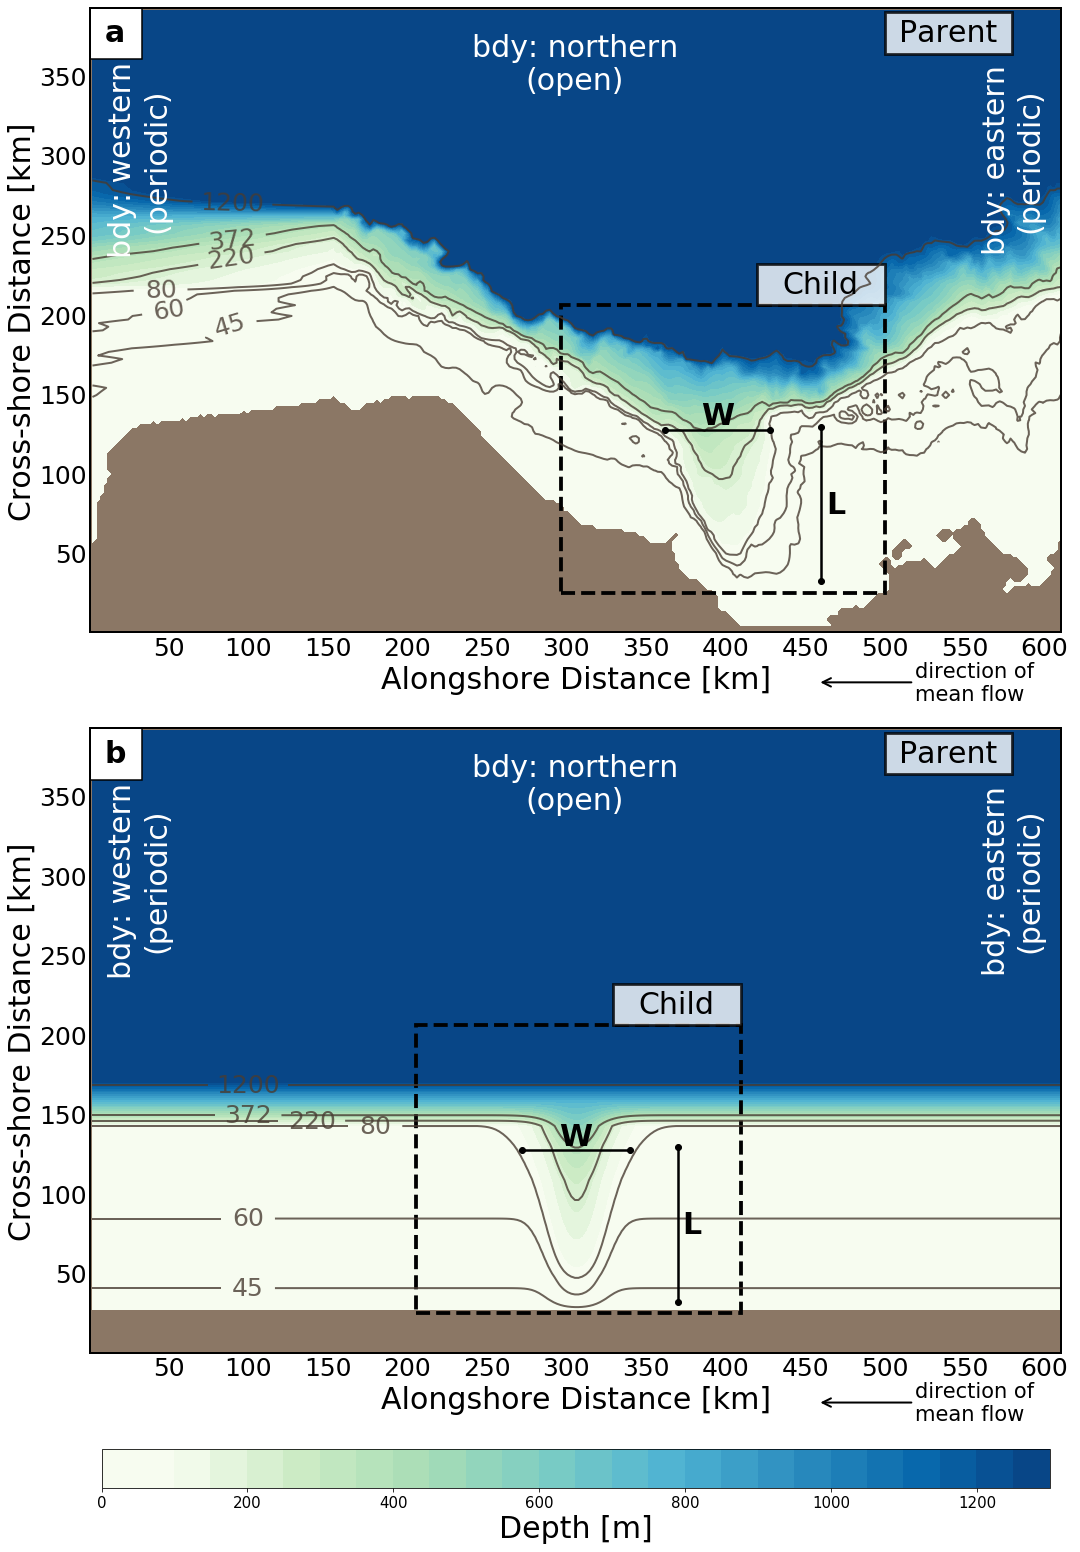

In [7]:
fig = plt.figure(figsize=(20,21))
gs = gridspec.GridSpec(11, 10)
ax1 = plt.subplot(gs[:5, :])
ax2 = plt.subplot(gs[5:10, :])
cax = plt.subplot(gs[-1, 1:9])
#     gs = gridspec.GridSpec(12, 10)
#     ax1 = plt.subplot(gs[:-1, :5])
#     ax2 = plt.subplot(gs[:-1, 5:])
#     cax = plt.subplot(gs[-1, :])

# fig, (ax1, ax2, cax) = plt.subplots(1,3,figsize=(18, 10), gridspec_kw={"width_ratios":[1,1, 0.08]})
lw, ms, fs_numb, fs_str = 2.5, 12, 25, 30
axs = [ax1, ax2]
bathys = [real_masked, ideal_masked]
dist_xs = [dist_xr, dist_xi]
dist_ys = [dist_yr, dist_yi]
masks = [maskr, maski]
clocs = [clocr, cloci]
labs = ['a', 'b']
inds = [inds_r, inds_i]

for ax, bathy, dist_x, dist_y, mask, cloc, ind, lab in zip(axs, bathys, dist_xs, dist_ys, masks, clocs, inds, labs):
    dist_x_km, dist_y_km = dist_x/1000, dist_y/1000
    
    ax.patch.set_color('#8b7765')
    p = ax.contourf(dist_x_km, dist_y_km, bathy, cmap=cmap, vmin=100, vmax=1300, levels=levels_cf, zorder=1)
    c = ax.contour(dist_x_km, dist_y_km, bathy, levels=levels_c, colors='#483C32', linewidths=2, zorder=2, alpha=0.8)
    plt.clabel(c, inline=1, fontsize=fs_numb, fmt='%1.f', manual=cloc, inline_spacing=16)
    
    if ax == ax1:
        x, y1, y2 = 460, 32, 129
        y, x1, x2 = 127, 362, 428
    elif ax == ax2:
        x, y1, y2 = 370, 32, 129#43, 141
        y, x1, x2 = 127, 272, 340

    ax.plot([x1, x2], [y, y], lw=lw, c='k', marker='.', ms=ms)
    ax.plot([x, x], [y1, y2], lw=lw, c='k', marker='.', ms=ms)
    ax.text(0.5*(x2-x1)+x1, y+9, 'W', rotation='horizontal', fontsize=fs_str, color='k', va='center', ha='center', weight='bold')
    ax.text(x+9, 0.5*(y2-y1)+y1, 'L', rotation='horizontal', fontsize=fs_str, color='k', va='center', ha='center', weight='bold')
    print('L on plot: ', y2-y1)
    print('W on plot: ', x2-x1)
        
    # AGRIF 
    imin, imax, jmin, jmax = dist_x_km[ind[0]], dist_x_km[ind[1]], dist_y_km[ind[2]], dist_y_km[ind[3]]
    ax.add_patch(patches.Rectangle((imin, jmin),(imax-imin),(jmax-jmin), fill=None, ec='k', lw=3.8, ls='--')) 
    
    ax.set_xlim([1, dist_x_km[-1]])
    ax.set_ylim([0, dist_y_km[-1]-1])
    ax.xaxis.set_ticks(np.arange(50, 650, 50))
    ax.yaxis.set_ticks(np.arange(50, 400, 50))
    ax.tick_params(direction='in', length=4, color='k', labelsize=fs_numb)
    ax.set_aspect(aspect='equal')
    ax.set_xlabel('Alongshore Distance [km]', fontsize=fs_str, labelpad=5)
    ax.set_ylabel('Cross-shore Distance [km]', fontsize=fs_str, labelpad=3)
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    
    # constants
    max_y = dist_y_km[-1]
    max_x = dist_x_km[-1]
    ind_y = 360
    ind_y_mid = ind_y + (max_y-ind_y)*0.5
    
    # plot label 
    ax.add_patch(patches.Rectangle((0, ind_y),(max_y-ind_y),(max_y-ind_y), fc='w', ec='k', lw=1.5, alpha=1))
    ax.annotate(lab, xy=((max_y-ind_y)*0.5, ind_y_mid), fontsize=30, weight='bold', va='center', ha='center')
    
    # boundaries
    wt = 'normal'
    ax.text(32, max_y-96, 'bdy: western\n(periodic)', 
            rotation='vertical', fontsize=fs_str, color='w', weight=wt, va='center', ha='center')
    ax.text((max_x-30), max_y-96, 'bdy: eastern\n(periodic)', 
            rotation='vertical', fontsize=fs_str, color='w', weight=wt, va='center', ha='center')
    ax.text((max_x*0.5), max_y-36, 'bdy: northern\n(open)', 
            rotation='horizontal', fontsize=fs_str, color='w', weight=wt, ha='center', va='center')
    
    # parent and child
    w, h = 80, 26
    ax.add_patch(patches.Rectangle((500, ind_y_mid-h*0.5),(w),(h), fc='w', ec='k', lw=2.8, alpha=0.8))
    ax.text(500+w*0.5, ind_y_mid, 'Parent', rotation='horizontal', fontsize=fs_str, color='k', ha='center', va='center')
    ax.add_patch(patches.Rectangle((imax-w, jmax),(w),(h), fc='w', ec='k', lw=2.8, alpha=0.8))
    ax.text(imax-w*0.5, jmax+h*0.5, 'Child', rotation='horizontal', fontsize=fs_str, color='k', ha='center', va='center')
    
    # direction of flow
    ax.annotate('direction of\nmean flow', xy=(0.75, -0.08), xycoords='axes fraction', xytext=(0.85, -0.08), 
                arrowprops=dict(arrowstyle="->", color='k', lw=2), ha='left', va='center', fontsize=fs_numb-4)
              
# colorbar
ip = InsetPosition(cax, [0.02, 0.05, 0.96, 0.95]) 
cax.set_axes_locator(ip)
cbar = fig.colorbar(p, cax=cax, ticks=np.arange(50, 1300, 150), orientation='horizontal')
cbar.ax.tick_params(labelsize=15)
cbar.set_label('Depth [m]', fontsize=fs_str)
cbar.set_ticks(np.arange(0, 1500, 200))
    
# overall
gs.tight_layout(fig)
gs.update(wspace=1.5, hspace=2)

# fig.savefig('./methods_domain.png', dpi=200, bbox_inches='tight', format='png')